In [34]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib as mpl
import pylab as plt
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib as mpl
import pylab as plt
import seaborn as sns

In [12]:
df = pd.read_csv('education.csv')

In [13]:
df = df.drop(['Region', 'Board Number', 'Board Name','School Number','School Special Conditions Code', 'Suite', 'PO Box',
             'Phone', 'Fax','School Email', 'School Website',
       'Board Website'], axis = 1)

In [14]:
cities= ['Toronto','Durham', 'Etobicoke','Pickering','Brampton','North York', 'Oshawa', 'Mississauga',
         'East York','TORONTO','Ajax','Markham', 'MISSISSAUGA','AJAX', 'PICKERING', 'OSHAWA',
        'York','BRAMPTON', 'SCARBOROUGH', 'Agincourt', 'Rexdale','UNIONVILLE','MARKHAM']

In [15]:
dffilt = df[df['City'].isin(cities)]

In [16]:
newdff = dffilt.replace({'City' : { 'OSHAWA' : 'Oshawa', 'AJAX' : 'Ajax', 'PICKERING' : 'Pickering', 'UNIONVILLE': 'MARKHAM',
                                  'MISSISSAUGA': 'Mississauga', 'BRAMPTON':'Brampton', 'East York': 'Toronto',
                                  'Agincourt': 'Toronto', 'Etobicoke': 'Toronto', "Rexdale" : "Brampton",
                                  'North York': 'Toronto', 'SCARBOROUGH': 'Toronto', 'TORONTO': 'Toronto',
                                  'MARKHAM':'Markham', "York": 'Toronto','Missisauga':'Mississauga'}})


In [17]:
pop = pd.read_csv('population.csv')

In [18]:
newdff["Population 0 to 14"] = 0
newdff["Population 14 to 19"] = 0

In [19]:
newdff["Population 0 to 14"][newdff['City'].str.contains("Ajax")] = 23660
newdff["Population 14 to 19"][newdff['City'].str.contains("Ajax")] = 8535

newdff["Population 0 to 14"][newdff['City'].str.contains("Brampton")] = 120245
newdff["Population 14 to 19"][newdff['City'].str.contains("Brampton")] = 42820

newdff["Population 0 to 14"][newdff['City'].str.contains("Markham")] = 55390
newdff["Population 14 to 19"][newdff['City'].str.contains("Markham")] = 21095

newdff["Population 0 to 14"][newdff['City'].str.contains("Mississauga")] = 120925
newdff["Population 14 to 19"][newdff['City'].str.contains("Mississauga")] = 49205

newdff["Population 0 to 14"][newdff['City'].str.contains("Oshawa")] = 26575
newdff["Population 14 to 19"][newdff['City'].str.contains("Oshawa")] = 9220

newdff["Population 0 to 14"][newdff['City'].str.contains("Pickering")] = 14915
newdff["Population 14 to 19"][newdff['City'].str.contains("Pickering")] = 6290

newdff["Population 0 to 14"][newdff['City'].str.contains("Toronto")] = 398135
newdff["Population 14 to 19"][newdff['City'].str.contains("Toronto")] = 145525

<ipython-input-19-687e28058900>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdff["Population 0 to 14"][newdff['City'].str.contains("Ajax")] = 23660
<ipython-input-19-687e28058900>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdff["Population 14 to 19"][newdff['City'].str.contains("Ajax")] = 8535
<ipython-input-19-687e28058900>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdff["Population 0 to 14"][newdff['City'].str.

In [20]:
city_count = newdff['City'].value_counts()

In [21]:
newdff["total schools"] = 0
newdff["total schools"][newdff['City'].str.contains("Ajax")] = 760

newdff["total schools"][newdff['City'].str.contains("Brampton")] = 281

newdff["total schools"][newdff['City'].str.contains("Markham")] = 204

newdff["total schools"][newdff['City'].str.contains("Mississauga")] = 88

newdff["total schools"][newdff['City'].str.contains("Oshawa")] = 71

newdff["total schools"][newdff['City'].str.contains("Pickering")] = 48

newdff["total schools"][newdff['City'].str.contains("Toronto")] = 28


<ipython-input-21-0697a6b93ec4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdff["total schools"][newdff['City'].str.contains("Ajax")] = 760
<ipython-input-21-0697a6b93ec4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdff["total schools"][newdff['City'].str.contains("Brampton")] = 281
<ipython-input-21-0697a6b93ec4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdff["total schools"][newdff['City'].str.contains("Markh

In [22]:
newdff['total child population'] = newdff['Population 0 to 14'] + newdff['Population 14 to 19']
newdff['percapita ratio'] = newdff['total schools'] / newdff['total child population']

newdff['Elementary counts'] = 0
newdff['Secondary counts'] = 0
newdff['Elem/Sec counts'] = 0

newdff['Elementary counts'][newdff['City'].str.contains("Ajax")] = 36
newdff['Secondary counts'][newdff['City'].str.contains("Ajax")] = 11
newdff['Elem/Sec counts'][newdff['City'].str.contains("Ajax")] =1

newdff['Elementary counts'][newdff['City'].str.contains("Brampton")] = 155
newdff['Secondary counts'][newdff['City'].str.contains("Brampton")] = 49

newdff['Elementary counts'][newdff['City'].str.contains("Markham")] = 51
newdff['Secondary counts'][newdff['City'].str.contains("Markham")] = 17
newdff['Elem/Sec counts'][newdff['City'].str.contains("Markham")] =3

newdff['Elementary counts'][newdff['City'].str.contains("Mississauga")] = 212
newdff['Secondary counts'][newdff['City'].str.contains("Mississauga")] = 63
newdff['Elem/Sec counts'][newdff['City'].str.contains("Mississauga")] =6

newdff['Elementary counts'][newdff['City'].str.contains("Oshawa")] = 54
newdff['Secondary counts'][newdff['City'].str.contains("Oshawa")] = 28
newdff['Elem/Sec counts'][newdff['City'].str.contains("Oshawa")] =6

newdff['Elementary counts'][newdff['City'].str.contains("Pickering")] = 22
newdff['Secondary counts'][newdff['City'].str.contains("Pickering")] = 6

newdff['Elementary counts'][newdff['City'].str.contains("Toronto")] = 559
newdff['Secondary counts'][newdff['City'].str.contains("Toronto")] = 194
newdff['Elem/Sec counts'][newdff['City'].str.contains("Toronto")] =7

newdff['ratio of elementary schools to kids 0-14'] = (newdff['Elementary counts']+newdff['Elem/Sec counts']) / newdff['Population 0 to 14']
newdff['ratio of secondary schools to kids 15-19'] = (newdff['Secondary counts']+newdff['Elem/Sec counts']) / newdff['Population 14 to 19']
newdff['ratio of secondary schools to kids 15-19'] = newdff['ratio of secondary schools to kids 15-19'] *1000
newdff['ratio of elementary schools to kids 0-14'] = newdff['ratio of elementary schools to kids 0-14'] *1000

<ipython-input-22-936a8f1595c7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdff['Elementary counts'][newdff['City'].str.contains("Ajax")] = 36
<ipython-input-22-936a8f1595c7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdff['Secondary counts'][newdff['City'].str.contains("Ajax")] = 11
<ipython-input-22-936a8f1595c7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdff['Elem/Sec counts'][newdff['City'].str.contains("A

In [23]:
canada = gpd.read_file("./gfsa000b11a_e.shp")
ontario = canada[canada['PRUID'] == '35']

In [24]:
newdff['Post'] = newdff['Postal Code'].str[:3]

In [25]:
new_dff=ontario.join(newdff.set_index('Post'), on='CFSAUID')

In [27]:
newdff= new_dff[new_dff.CFSAUID != 'N0A']
newdff= newdff[newdff.CFSAUID != 'N0G']
newdff= newdff[newdff.CFSAUID !=  'L4N']

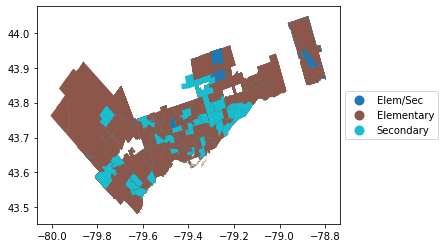

In [28]:
ax = newdff.plot(column='School Level', categorical=True, legend=True, \
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5),
                         'fmt': "{:.0f}"})

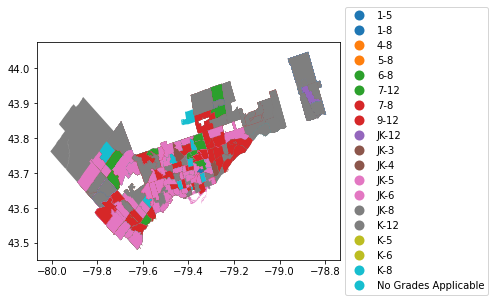

In [29]:
ax = newdff.plot(column='Grade Range', categorical=True, legend=True, \
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5),
                         'fmt': "{:.0f}"})

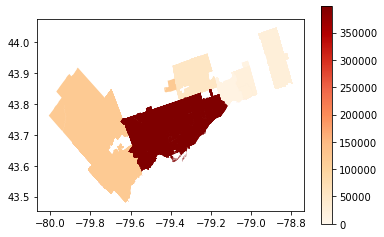

In [30]:
ax = newdff.plot(column='Population 0 to 14', categorical=False, cmap = 'OrRd', legend = True)

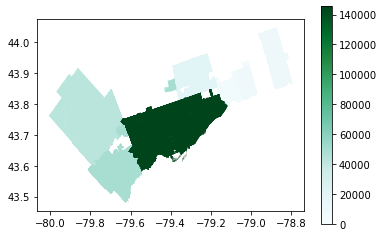

In [31]:
ax = newdff.plot(column='Population 14 to 19', categorical=False, cmap ='BuGn', legend= True)

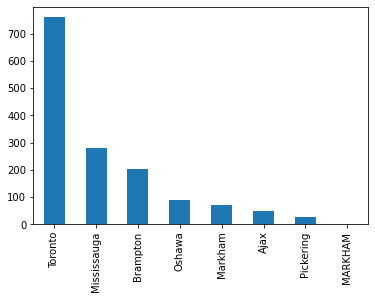

In [32]:
newdff.City.value_counts().plot(kind = 'bar')

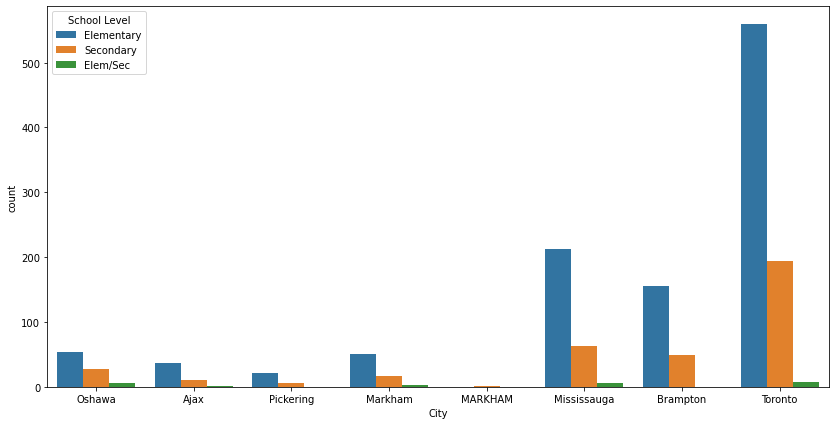

In [36]:
plt.figure(figsize=(14, 7))
sns.countplot('City', hue = "School Level", data = newdff)

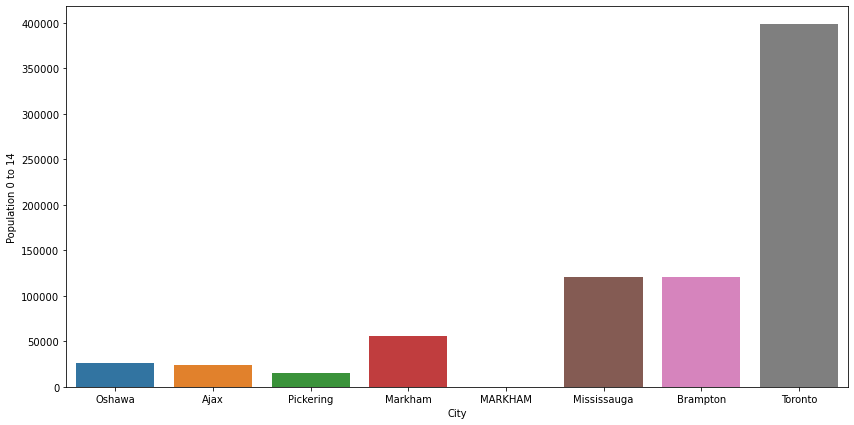

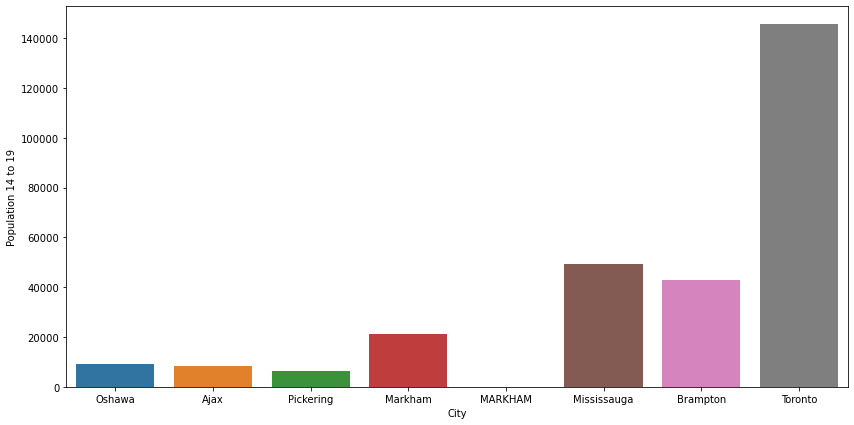

In [37]:
plt.figure(figsize=(14, 7))
sns.barplot('City', 'Population 0 to 14', data=newdff)
plt.figure(figsize=(14, 7))
sns.barplot('City', 'Population 14 to 19', data=newdff)

Text(0.5, 1.0, 'Per capita ratio of schools')

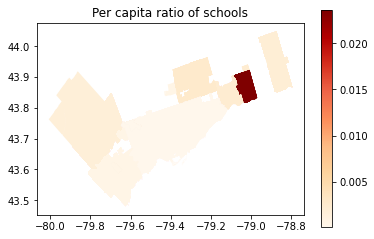

In [39]:
ax = newdff.plot(column='percapita ratio', categorical=False, cmap = 'OrRd', legend = True)
plt.title("Per capita ratio of schools")

Text(0.5, 1.0, 'Elementary schools per 1000 kids ages 0-14')

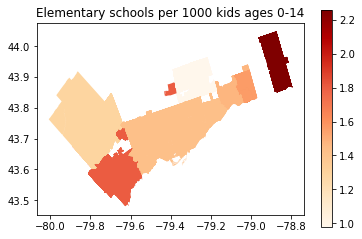

In [40]:
ax = newdff.plot(column='ratio of elementary schools to kids 0-14', categorical=False, cmap = 'OrRd', legend = True)
plt.title("Elementary schools per 1000 kids ages 0-14")

Text(0.5, 1.0, 'Secondary schools per 1000 kids ages 15-19')

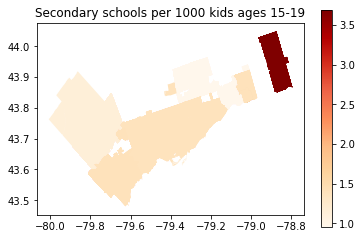

In [41]:
ax = newdff.plot(column='ratio of secondary schools to kids 15-19', categorical=False, cmap = 'OrRd', legend = True)
plt.title("Secondary schools per 1000 kids ages 15-19")